# 초기 세팅

In [ ]:
# 패키지 세팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.initializers import GlorotUniform
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed
from keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 구글 드라이브 이용
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# train data, test data 호출
train_data = pd.read_csv("/content/drive/MyDrive/Colab_data analysis/00. project/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab_data analysis/00. project/test_data.csv")

In [ ]:
# type 분리
train_data_0 = train_data[train_data["type"]==0]
train_data_1 = train_data[train_data["type"]==1]
train_data_2 = train_data[train_data["type"]==2]
train_data_3 = train_data[train_data["type"]==3]
train_data_4 = train_data[train_data["type"]==4]
train_data_5 = train_data[train_data["type"]==5]
train_data_6 = train_data[train_data["type"]==6]
train_data_7 = train_data[train_data["type"]==7]
test_data_0 = test_data[test_data["type"]==0]
test_data_1 = test_data[test_data["type"]==1]
test_data_2 = test_data[test_data["type"]==2]
test_data_3 = test_data[test_data["type"]==3]
test_data_4 = test_data[test_data["type"]==4]
test_data_5 = test_data[test_data["type"]==5]
test_data_6 = test_data[test_data["type"]==6]
test_data_7 = test_data[test_data["type"]==7]

# 간단 정보 확인

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   out_pressure   2463 non-null   float64
 3   motor_current  2463 non-null   float64
 4   motor_rpm      2463 non-null   float64
 5   motor_temp     2463 non-null   float64
 6   motor_vibe     2463 non-null   float64
 7   type           2463 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 154.1 KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389 entries, 0 to 7388
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     7389 non-null   float64
 1   air_end_temp   7389 non-null   float64
 2   out_pressure   7389 non-null   float64
 3   motor_current  7389 non-null   float64
 4   motor_rpm      7389 non-null   float64
 5   motor_temp     7389 non-null   float64
 6   motor_vibe     7389 non-null   float64
 7   type           7389 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 461.9 KB


In [ ]:
train_data.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369
std,1.202328,8.725091,2.964897e-14,13.604597,687.870774,7.797152,1.576386,2.230113
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000


In [ ]:
test_data.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000
mean,2.103129,49.042735,0.699840,27.417935,2373.820003,65.771623,3.345523,2.957369
std,1.163998,8.686208,0.005377,13.234089,687.737182,7.741473,0.644199,2.229811
min,0.340000,32.080000,0.490000,5.370000,1200.000000,50.420000,1.970000,0.000000
25%,1.280000,41.510000,0.700000,17.200000,1774.000000,59.110000,2.890000,1.000000
50%,1.940000,48.760000,0.700000,26.170000,2355.000000,65.520000,3.260000,3.000000
75%,2.770000,56.580000,0.700000,35.860000,2972.000000,72.440000,3.730000,5.000000
max,6.240000,65.540000,0.700000,74.000000,3564.000000,82.390000,6.260000,7.000000


In [ ]:
pd.pivot_table(train_data, index = ["type"],
               values = ["air_inflow", "air_end_temp", "motor_current", "motor_rpm", "motor_temp", "motor_vibe"],
               aggfunc = np.mean)

,air_end_temp,air_inflow,motor_current,motor_rpm,motor_temp,motor_vibe
type,,,,,,
0,50.286481,2.288264,29.612616,2422.831019,66.920417,3.345926
1,47.503767,1.378672,20.296125,2346.306233,64.243388,3.901572
2,46.121393,0.647158,10.354044,2329.617486,62.884481,2.594590
3,51.005588,4.270588,49.470588,2440.359477,68.115033,4.556144
4,48.935556,2.186275,28.291307,2314.728758,65.719248,3.286307
5,50.068193,2.272129,29.398795,2405.341365,66.725863,3.336586
6,49.422932,2.222972,28.768273,2353.755020,66.152892,3.307952
7,49.470108,2.226559,28.813925,2357.500000,66.194355,3.309946


In [ ]:
pd.pivot_table(test_data, index = ["type"],
               values = ["air_inflow", "air_end_temp", "motor_current", "motor_rpm", "motor_temp", "motor_vibe"],
               aggfunc = np.mean)

,air_end_temp,air_inflow,motor_current,motor_rpm,motor_temp,motor_vibe
type,,,,,,
0,49.741651,2.207276,29.111350,2368.987654,66.300054,3.340625
1,47.948365,1.397615,20.630388,2395.774164,64.619702,3.131364
2,46.548588,0.656202,10.552423,2365.934426,63.333944,2.613379
3,50.093617,4.130131,48.016340,2363.023965,67.368965,4.540153
4,49.855120,2.250806,29.153301,2385.258170,66.502800,3.325501
5,49.513307,2.216252,28.869880,2357.748327,66.197336,3.318220
6,50.082383,2.221954,29.429264,2392.676037,66.585569,3.358969
7,49.411254,2.219857,28.758459,2352.222222,66.135950,3.308566


# 시각화

<Axes: xlabel='type', ylabel='motor_vibe'>

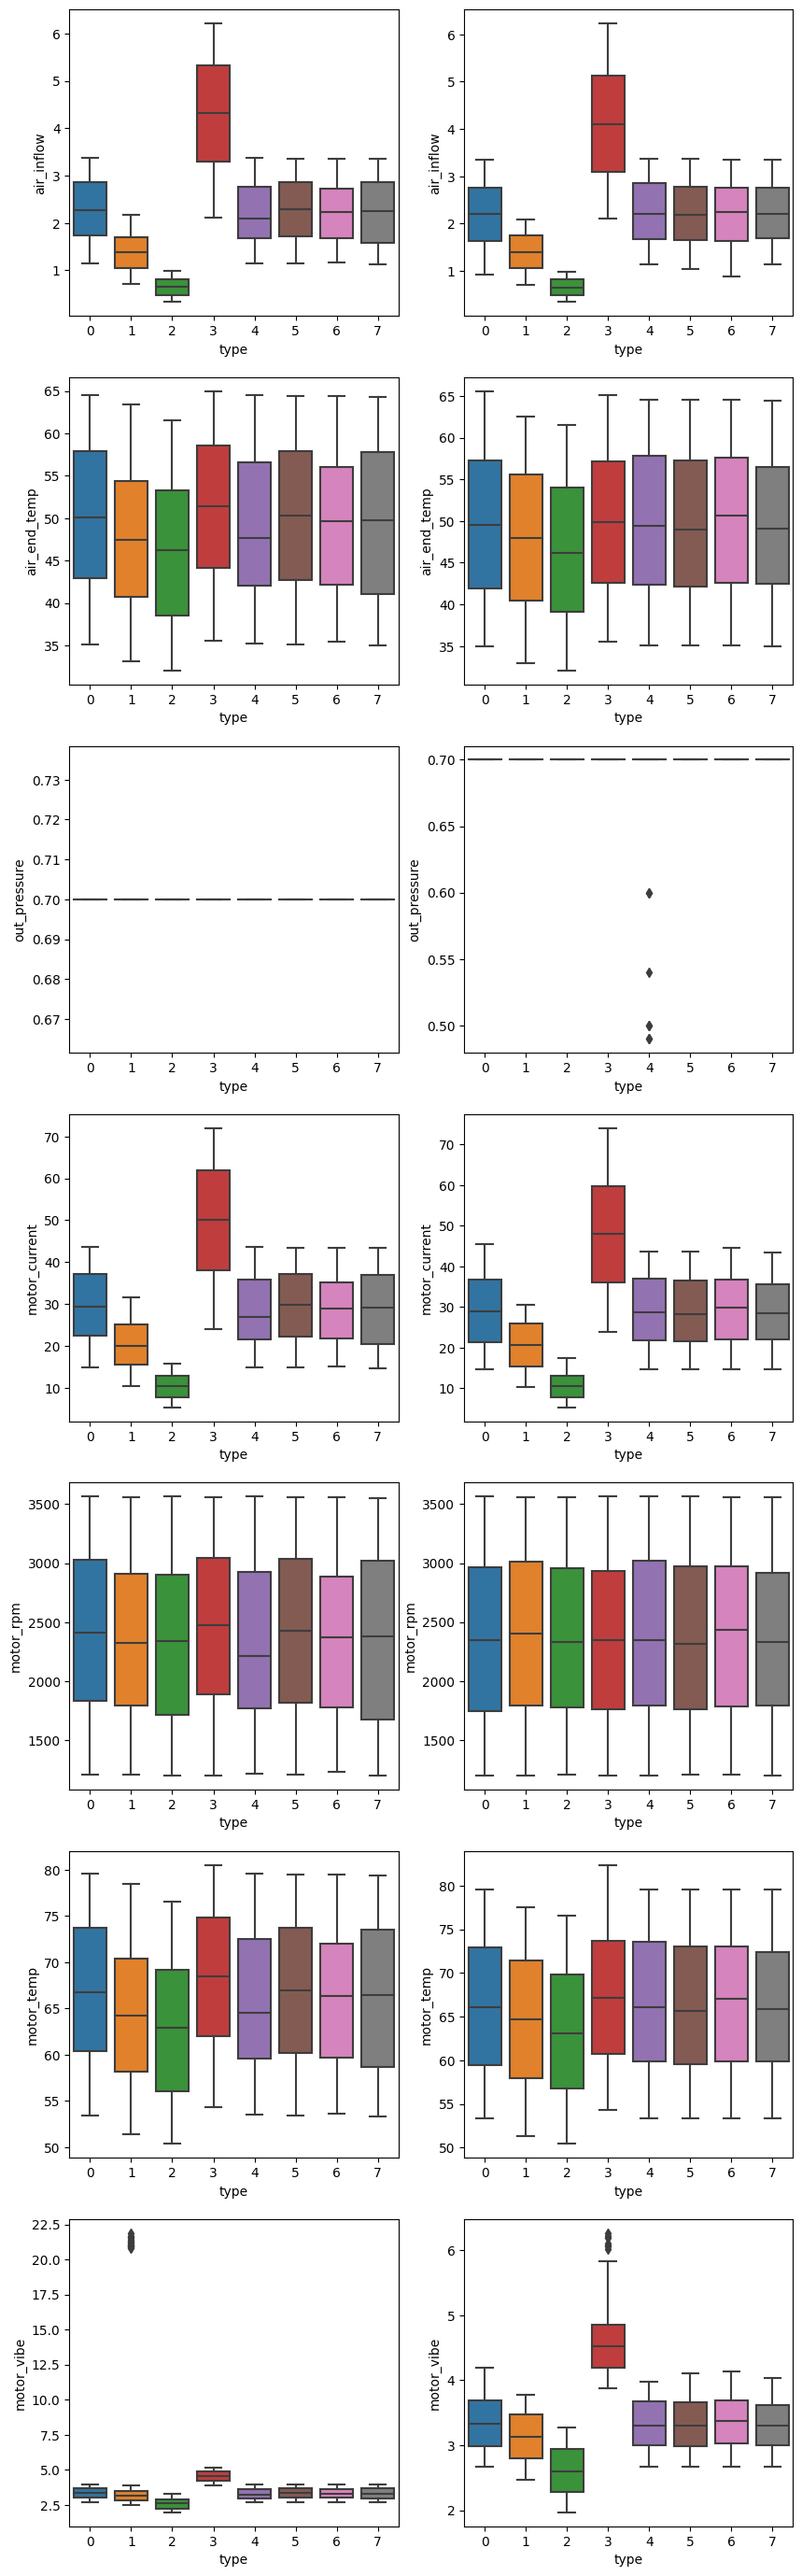

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,35))
sns.boxplot(x='type',y='air_inflow',data=train_data,ax=axes[0,0])
sns.boxplot(x='type',y='air_inflow',data=test_data,ax=axes[0,1])

sns.boxplot(x='type',y='air_end_temp',data=train_data,ax=axes[1,0])
sns.boxplot(x='type',y='air_end_temp',data=test_data,ax=axes[1,1])
# train data의 motor_vibe에서 특이값 보임. 이를 어떻게 처리할 지 논의 필요

sns.boxplot(x='type',y='out_pressure',data=train_data,ax=axes[2,0])
sns.boxplot(x='type',y='out_pressure',data=test_data,ax=axes[2,1])

sns.boxplot(x='type',y='motor_current',data=train_data,ax=axes[3,0])
sns.boxplot(x='type',y='motor_current',data=test_data,ax=axes[3,1])
# type3은 HP 50으로, 다른 type들에 비해 전반적으로 큰 값을 가짐
# motor_vibe에서 특이값 보임

sns.boxplot(x='type',y='motor_rpm',data=train_data,ax=axes[4,0])
sns.boxplot(x='type',y='motor_rpm',data=test_data,ax=axes[4,1])
# out_pressure에서 이상 데이터 보임

sns.boxplot(x='type',y='motor_temp',data=train_data,ax=axes[5,0])
sns.boxplot(x='type',y='motor_temp',data=test_data,ax=axes[5,1])

sns.boxplot(x='type',y='motor_vibe',data=train_data,ax=axes[6,0])
sns.boxplot(x='type',y='motor_vibe',data=test_data,ax=axes[6,1])

# 모델링

In [ ]:
# 모델 함수 정의
def autoencoder_model(X):
    initializer = GlorotUniform(seed=2)
    inputs = Input(shape=(X.shape[1], X.shape[2]))

    # Encoder
    encoder = LSTM(128, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00), kernel_initializer=initializer)(inputs)
    encoder = LSTM(64, activation='relu', return_sequences=True, kernel_initializer=initializer)(encoder)
    encoder = LSTM(32, activation='relu', return_sequences=False, kernel_initializer=initializer)(encoder)
    # Decoder
    decoder = LSTM(32, activation='relu', return_sequences=True, kernel_initializer=initializer)(encoder)
    decoder = LSTM(64, activation='relu', return_sequences=True, kernel_initializer=initializer)(decoder)
    decoder = LSTM(128, activation='relu', return_sequences=True, kernel_initializer=initializer)(decoder)

    output = TimeDistributed(Dense(X.shape[2]))(decoder)
    model = Model(inputs=inputs, outputs=output)
    return model

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_184 (LSTM)             (None, 1, 32)             5120      
                                                                 
 lstm_185 (LSTM)             (None, 16)                3136      
                                                                 
 repeat_vector_46 (RepeatVec  (None, 1, 16)            0         
 tor)                                                            
                                                                 
 lstm_186 (LSTM)             (None, 1, 16)             2112      
                                                                 
 lstm_187 (LSTM)             (None, 1, 32)             6272      
                                                          

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:698: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


Model: "model_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_188 (LSTM)             (None, 1, 32)             5120      
                                                                 
 lstm_189 (LSTM)             (None, 16)                3136      
                                                                 
 repeat_vector_47 (RepeatVec  (None, 1, 16)            0         
 tor)                                                            
                                                                 
 lstm_190 (LSTM)             (None, 1, 16)             2112      
                                                                 
 lstm_191 (LSTM)             (None, 1, 32)             6272      
                                                          

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:698: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_192 (LSTM)             (None, 1, 32)             5120      
                                                                 
 lstm_193 (LSTM)             (None, 16)                3136      
                                                                 
 repeat_vector_48 (RepeatVec  (None, 1, 16)            0         
 tor)                                                            
                                                                 
 lstm_194 (LSTM)             (None, 1, 16)             2112      
                                                                 
 lstm_195 (LSTM)             (None, 1, 32)             6272      
                                                          

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:698: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_196 (LSTM)             (None, 1, 32)             5120      
                                                                 
 lstm_197 (LSTM)             (None, 16)                3136      
                                                                 
 repeat_vector_49 (RepeatVec  (None, 1, 16)            0         
 tor)                                                            
                                                                 
 lstm_198 (LSTM)             (None, 1, 16)             2112      
                                                                 
 lstm_199 (LSTM)             (None, 1, 32)             6272      
                                                          

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:698: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


Model: "model_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_200 (LSTM)             (None, 1, 32)             5120      
                                                                 
 lstm_201 (LSTM)             (None, 16)                3136      
                                                                 
 repeat_vector_50 (RepeatVec  (None, 1, 16)            0         
 tor)                                                            
                                                                 
 lstm_202 (LSTM)             (None, 1, 16)             2112      
                                                                 
 lstm_203 (LSTM)             (None, 1, 32)             6272      
                                                          

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:698: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_204 (LSTM)             (None, 1, 32)             5120      
                                                                 
 lstm_205 (LSTM)             (None, 16)                3136      
                                                                 
 repeat_vector_51 (RepeatVec  (None, 1, 16)            0         
 tor)                                                            
                                                                 
 lstm_206 (LSTM)             (None, 1, 16)             2112      
                                                                 
 lstm_207 (LSTM)             (None, 1, 32)             6272      
                                                          

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:698: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


Model: "model_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_53 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_208 (LSTM)             (None, 1, 32)             5120      
                                                                 
 lstm_209 (LSTM)             (None, 16)                3136      
                                                                 
 repeat_vector_52 (RepeatVec  (None, 1, 16)            0         
 tor)                                                            
                                                                 
 lstm_210 (LSTM)             (None, 1, 16)             2112      
                                                                 
 lstm_211 (LSTM)             (None, 1, 32)             6272      
                                                          

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:698: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_54 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_212 (LSTM)             (None, 1, 32)             5120      
                                                                 
 lstm_213 (LSTM)             (None, 16)                3136      
                                                                 
 repeat_vector_53 (RepeatVec  (None, 1, 16)            0         
 tor)                                                            
                                                                 
 lstm_214 (LSTM)             (None, 1, 16)             2112      
                                                                 
 lstm_215 (LSTM)             (None, 1, 32)             6272      
                                                          

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:698: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


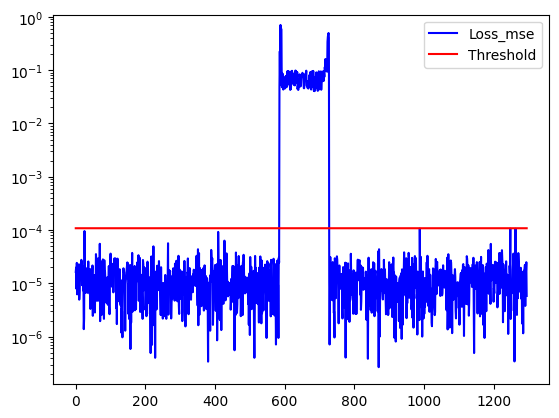

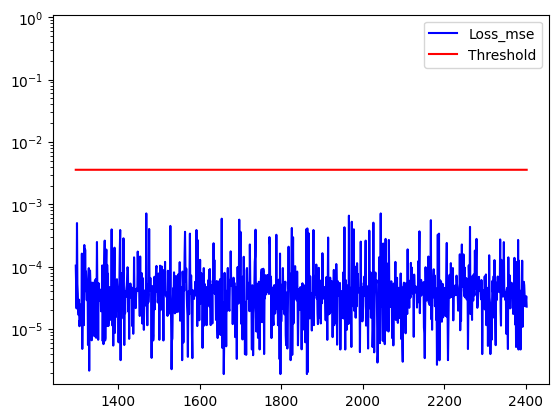

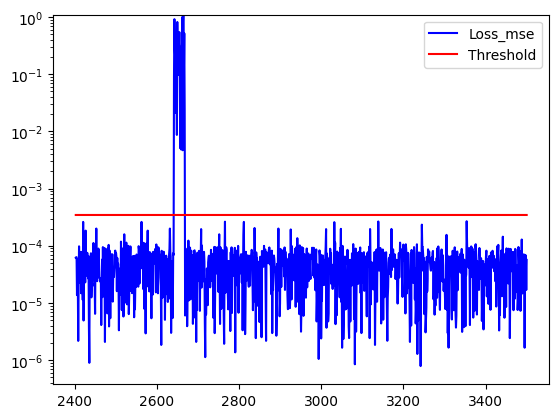

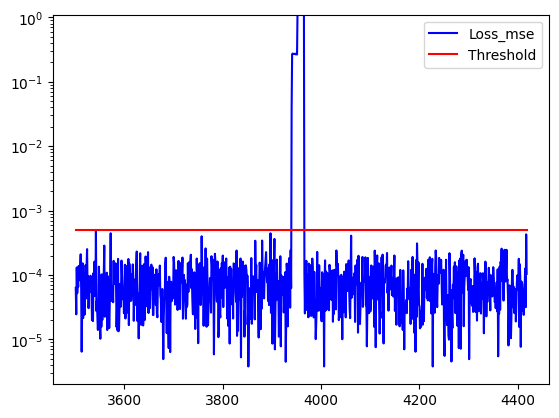

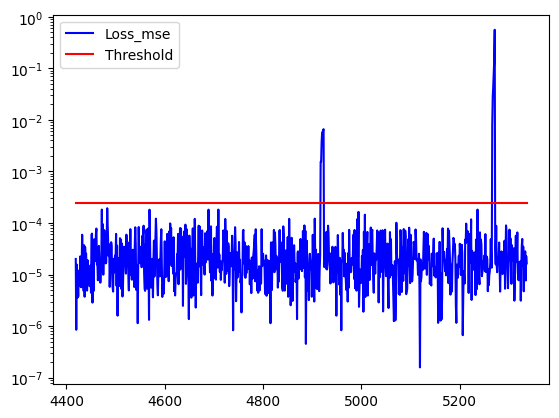

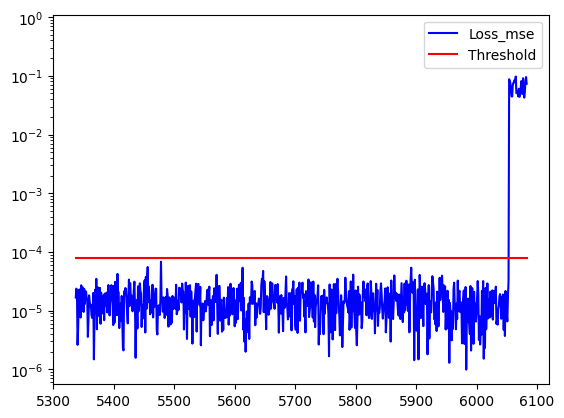

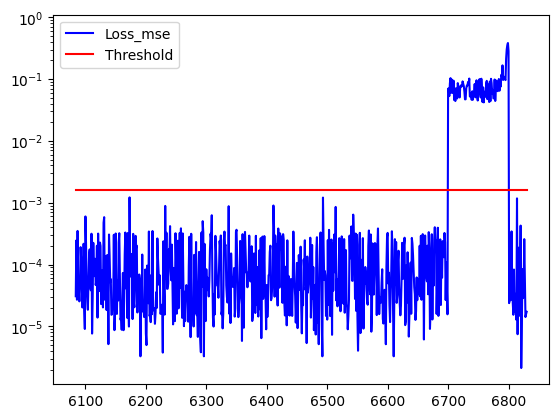

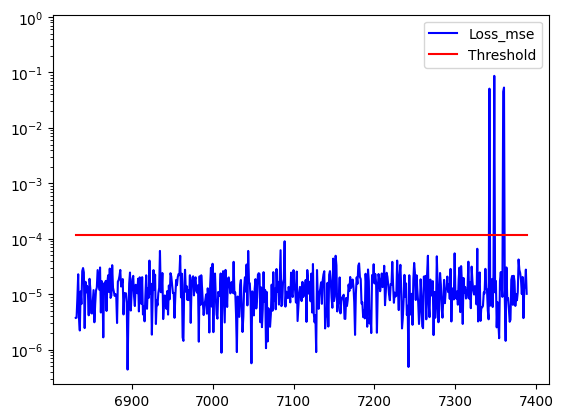

In [ ]:
# 학습 및 평가 함수 정의
for i in range(8):
    # 데이터 불러오기 및 type 분류
    train = train_data[train_data['type']==i]
    test = test_data[test_data['type']==i]
    train1 = train.drop(['type'],axis=1)
    test1 = test.drop(['type'],axis=1)

    # scaling
    std = MinMaxxScaler()
    X_train = std.fit_transform(train1)
    X_test = std.transform(test1)

    # lstm에 맞춘 차원 변환
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    # EarlyStopping 콜백
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    checkpointer = ModelCheckpoint(filepath="model.h5", verbose=0, save_best_only=True)

    # 모델 호출 및 학습
    model = autoencoder_model(X_train)
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    nb_epochs = 300
    batch_size = 32
    history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                        validation_split=0.05, callbacks=[early_stopping, checkpointer]).history
    model = load_model('model.h5')

    X_pred = model.predict(X_train)
    X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
    X_pred = pd.DataFrame(X_pred, columns=train1.columns)
    X_pred.index = train.index

    scored = pd.DataFrame(index = train.index)
    Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
    scored['Loss_mse'] = np.mean(np.power(X_pred - Xtrain, 2), axis=1)

    # threshold: 최대값의 105%
    threshold = np.percentile(scored,100) * 1.05
    print('anomaly threshold = {}'.format(threshold))

    # 예측 및 평가
    X_pred = model.predict(X_test)
    X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
    X_pred = pd.DataFrame(X_pred, columns=test1.columns)
    X_pred.index = test.index

    scored = pd.DataFrame(index = test.index)
    Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
    scored['Loss_mse'] = np.mean(np.power(X_pred - Xtest, 2), axis=1)
    scored['Threshold'] = threshold
    scored['Anomaly'] = (scored['Loss_mse'] > scored['Threshold'])

    # 예측 결과 그래프
    scored.plot(logy=True, ylim=[0,1.10], color=['blue','red','orange'])

    # 라벨
    labels = np.where(scored['Anomaly'],1,0)

    # 결과 출력
    print("이상 데이터 비율: {:.2f}%".format(np.mean(labels) * 100))

    # 최종결과 저장
    a = pd.DataFrame(list(labels),list(test['type'])).reset_index()
    globals()[f'answer{i}'] = a.rename(columns= {'index':'type'})

In [ ]:
# 제출용 답안지 저장
final= pd.concat([answer0,answer1,answer2,answer3,answer4,answer5,answer6,answer7],axis=0).reset_index(drop=True)
final = final.rename(columns= {0:'label'})
final.to_csv('/content/drive/MyDrive/Colab_data analysis/00. project/final/mse_std01.csv')